# Libraries

In [1]:
import os 
import pathlib
from glob import glob 
# Remove tensorflow warnings
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Install the Object Detection API : inspired from [parthbkgadoya's notebook](https://www.kaggle.com/parthbkgadoya/tensorflow-object-detection-api-installation)

## Download the models

In [3]:
!git clone https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


## Compile proto files

> Note : upgrading pip before installing these packages resolves the issue raised [here](https://github.com/tensorflow/models/issues/10375)

In [4]:
!pip install --upgrade pip 
%cd models/research
!pip install --user protobuf
!protoc object_detection/protos/*.proto --python_out=.
%cd ..
%cd ..

     |████████████████████████████████| 2.1 MB 5.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
/content/models/research
/content/models
/content


## Install the CocoAPI

In [5]:
!pip install --user cython 
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ..
%cd ..
!cp -r cocoapi/PythonAPI/pycocotools models/research/

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 18.61 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-prote

## Install the object detection api

In [6]:
%cd models/research
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .
%cd ..
%cd ..

/content/models/research
Processing /content/models/research
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.8/99.8 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.6/237.6 KB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━

## Verify the TensorFlow 2 Object Detection API installation (optional)

In [7]:
%cd models/research
!python object_detection/builders/model_builder_tf2_test.py
%cd ..
%cd ..

/content/models/research
Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0421 02:08:55.560192 140259182540672 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.27s
I0421 02:08:56.251277 140259182540672 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.27s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.13s
I0421 02:08:57.380561 140259182540672 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.13s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_hea

# Train the model 

The dataset includes a set of useful tools, like a ready-to-use workspace which contains : 
- The resnet50 pre-trained model
- The custom training pipeline suitable to our model 
- The training script from Tensorflow Object Detection API

In [8]:
%cd /

/


In [9]:
%cd /content/drive/MyDrive/Object_Detection_API/OP_characters_detector 
!pwd

/content/drive/MyDrive/Object_Detection_API/OP_characters_detector
/content/drive/MyDrive/Object_Detection_API/OP_characters_detector


## Train : batch size = 8

In [10]:
!pip install opencv-python-headless==4.5.2.52

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 29.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64


In [ ]:
!python "/content/drive/MyDrive/Object_Detection_API/workspace/model_main_tf2.py" \
--model_dir="/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50" \
--pipeline_config_path="/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/pipeline_batch_size_4_colab.config"

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0420 22:24:08.503518 140381310605184 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I0420 22:24:08.976664 140381310605184 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0420 22:24:08.976941 140381310605184 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0420 22:24:09.237367 140381310605184 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experimental_distribute_datasets_from_function (from tensorflow.python.distribute.distribute_lib) is deprecated and will be removed in a future version.
Instructions for updating:
rename to distribute_datasets_from_function
INFO

## Export the SavedModel model 

In [ ]:
!python "/content/models/research/object_detection/exporter_main_v2.py" \
--input_type image_tensor \
--pipeline_config_path "/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/pipeline_batch_size_4_colab_resume.config" \
--trained_checkpoint_dir "/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50" \
--output_directory "/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/OP_characters_detector_export/SavedModel"

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0421 00:10:49.653352 140514128406400 deprecation.py:615] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0421 00:11:08.854010 140514128406400 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7fcb60454d10>, because it is not built.
W0421 00:11:26.350481 140514128406400 

## Export the TFLite model

In [ ]:
!python "/content/models/research/object_detection/export_tflite_graph_tf2.py" \
--pipeline_config_path "/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/pipeline_batch_size_4_colab_resume.config" \
--trained_checkpoint_dir "/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50" \
--output_directory "/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/OP_characters_detector_export/TFLite"

W0421 00:37:36.876507 139905143478144 save_impl.py:72] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x7f3d901f5bd0>, because it is not built.
W0421 00:37:53.610697 139905143478144 save.py:265] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 208). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/OP_characters_detector_export/TFLite/saved_model/assets
I0421 00:38:00.088991 139905143478144 builder_impl.py:780] Assets written to: /content/drive/MyDrive/Object_Detection_API/workspace/models/m

## Downgrade Flatbuffers 

It helps resolving [this issue](https://github.com/tensorflow/tensorflow/issues/51590) (EndVector() takes 1 positional argument but 2 were given) when writing to the buffer. 

In [4]:
!pip uninstall -y flatbuffers 
!pip install --upgrade flatbuffers==1.12

Found existing installation: flatbuffers 1.12
Uninstalling flatbuffers-1.12:
  Successfully uninstalled flatbuffers-1.12
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)


In [6]:
import tensorflow as tf

## Convert the exported SavedModel to TFLite

In [7]:
TFLITE_MODEL_PATH = "/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/OP_characters_detector_export/TFLite/saved_model/tflite_model/op_detector.tflite"

# Intialize the converter 
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/OP_characters_detector_export/TFLite/saved_model/")
# Add optimizations
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Convert the model
tflite_model = converter.convert()

# Write the model
with open(TFLITE_MODEL_PATH, "wb") as f:
  f.write(tflite_model)

## Write metadata for inferences

## Install the TFLite support package

In [8]:
!pip install -q tflite_support

In [9]:
from object_detection.utils import label_map_util

## Write the TFLite label map

In [10]:
# We need to convert the Object Detection API's labelmap into what the Task API needs:
# a txt file with one class name on each line from index 0 to N.
# The first '0' class indicates the background.
# This code assumes COCO detection which has 90 classes, you can write a labela
# map file for your model if re-trained.
TFLITE_LABEL_PATH = "/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/TFRecords/tf_label_map.pbtxt"
TFLITE_NEW_LABEL_PATH = "/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/TFRecords/tf_label_map.txt"

# Get the labelmap 
category_index = label_map_util.create_category_index_from_labelmap(TFLITE_LABEL_PATH)
# Get the categories from the labelmap
categories = [category["name"] for category in category_index.values()]
# Display results
print(f"Categories: {categories}")

# Write the categories to the file 
with open(TFLITE_NEW_LABEL_PATH, "w") as file:
  # Loop through the categories
  for category in categories:
    print(category)
    category = category + "\n"
    # Write each category to the file
    file.write(category) 

Categories: ['character']
character


## Write the metadata

In [11]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

# Set the model path
TFLITE_MODEL_WITH_METADATA_PATH = TFLITE_MODEL_PATH

# Setup the writer
writer = object_detector.MetadataWriter.create_for_inference(
    writer_utils.load_file(TFLITE_MODEL_WITH_METADATA_PATH), 
    input_norm_mean=[127.5], 
    input_norm_std=[127.5], 
    label_file_paths=[TFLITE_NEW_LABEL_PATH]
    )

# Write the metadata
writer_utils.save_file(writer.populate(), TFLITE_MODEL_WITH_METADATA_PATH)

# Test the model (optional)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load the exported model 

In [ ]:
model = tf.saved_model.load("/content/drive/MyDrive/Object_Detection_API/workspace/models/myresnet_50/OP_characters_detector_export/SavedModel/saved_model")

## Get the test files

In [ ]:
test_dir = "/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images"
test_filenames = glob(test_dir+"/*")
print(f"Test file names: {np.array(test_filenames)}")

Test file names: ['/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images/688.png'
 '/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images/66.png'
 '/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images/623.png'
 '/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images/548.png'
 '/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images/520.png'
 '/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images/452.png'
 '/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/Test images/4 characters.jpg']


## Load the label map

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap("/content/drive/MyDrive/Object_Detection_API/OP_characters_detector/TFRecords/tf_label_map.pbtxt",use_display_name=True)

## Predict an save the predictions

--------------------------------------------
File: 688.png 

Done


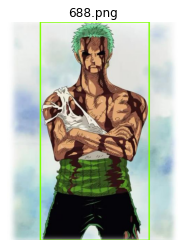

--------------------------------------------
File: 66.png 

Done


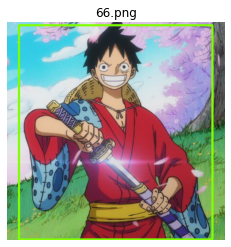

--------------------------------------------
File: 623.png 

Done


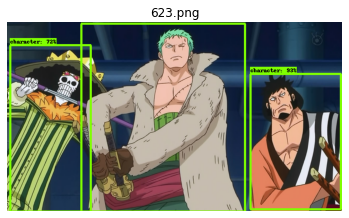

--------------------------------------------
File: 548.png 

Done


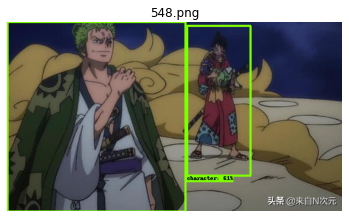

--------------------------------------------
File: 520.png 

Done


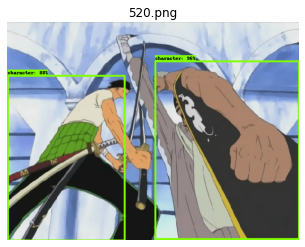

--------------------------------------------
File: 452.png 

Done


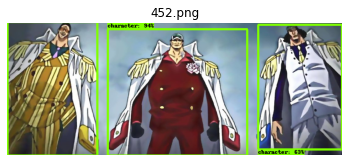

--------------------------------------------
File: 4 characters.jpg 

Done


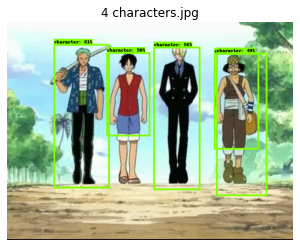

In [ ]:
predictions = []

for file in test_filenames:
    #Read the image and create the input tensor
    image = Image.open(file)
    image_np = np.array(image)
    filename = os.path.basename(file)
    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = np.expand_dims(image_np, 0)

    #Make an inference
    detections = model(input_tensor)
    
    #Get the results 
    num_detections = int(detections.pop("num_detections"))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections
    
    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    image_np_with_detections = image_np.copy()
    
    print("--------------------------------------------")
    print(f"File: {filename} \n")
    
    #Visualize the results
    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.45,
          agnostic_mode=False)

    plt.figure()
    plt.title(f"{filename}")
    plt.axis("off")
    plt.imshow(image_np_with_detections)
    
    print("Done")
    plt.show()